In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 2.1
df = pd.read_csv("Scn2_GWP_NPV_pareto.csv")
# 2.2
print(df)

    Unnamed: 0     PV Roof   PV Facade            GWP           NPV  \
0            0  114.000000    0.000000  297646.723768  92701.742394   
1            1    0.509934  129.000000  279679.122005 -92723.761582   
2            2   33.391952  129.000000  279717.067049 -68578.670472   
3            3  114.000000   88.544501  285411.392284  11115.245124   
4            4  114.000000  114.765623  281865.320973 -15891.179006   
..         ...         ...         ...            ...           ...   
95          95   12.319013  129.000000  279683.709946 -83585.366843   
96          96  114.000000   26.029187  294020.680138  69848.376086   
97          97  113.827461   34.291451  292869.554097  62355.297867   
98          98  114.000000   11.570337  296033.257783  82622.268044   
99          99  114.000000   50.501258  290635.593620  47617.003287   

    Normalized GWP  Normalized NPV          GWP_1          GWP_2  \
0         1.000000        1.000000  301321.308824  297646.723768   
1         0

In [10]:
# 2.3 100 observationer
# 2.4
df.describe()

,Unnamed: 0,PV Roof,PV Facade,GWP,NPV,Normalized GWP,Normalized NPV,GWP_1,GWP_2,GWP 1 per kWh(gCO2e/kWh),GWP 2 per kWh(gCO2e/kWh)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,98.904464,81.702970,286372.377742,9143.321445,0.372518,0.549369,293125.173251,286372.377742,23.653705,23.108789
std,29.011492,31.850905,42.706215,5867.529024,51324.380580,0.326562,0.276792,5805.135490,5867.529024,0.468445,0.473480
min,0.000000,0.509934,0.000000,279679.122005,-92723.761582,0.000000,0.000000,280256.648042,279679.122005,22.615280,22.568677
25%,24.750000,112.775911,42.664373,280716.297886,-26759.838766,0.057725,0.355744,292479.455939,280716.297886,23.601599,22.652372
50%,49.500000,113.989644,91.601450,284992.967125,8026.035377,0.295746,0.543344,293884.939831,284992.967125,23.715014,22.997477
75%,74.250000,114.000000,124.939552,291716.093972,54834.402451,0.669926,0.795781,297432.923049,291716.093972,24.001318,23.539999
max,99.000000,114.000000,129.000000,297646.723768,92701.742394,1.000000,1.000000,301321.308824,297646.723768,24.315091,24.018571


In [11]:
# 2.5 -26759.838766
# 2.6 
# Första raden count visar att alla columner har hundra rader vilket betyder att ingen av collumnerna sakanar värden.
# PV Roof Värdena varierar från ett minimum på 0,51 till ett maximum på 114,0. den 75:e percentilen också 114,0, vilket tyder på att en stor del av lösningarna utnyttjar den maximala tillgängliga takkapaciteten.
# PV Facade varierar från 0 till 129,0. Medelvärdet (81,7) är lägre än takets medelvärde (98,9) vilket indikerar att det i genomsnitt används mindre fasad-solceller jämfört med tak-solceller i dessa scenarier.
# NPV Medelvärde mot Median. Medelvärdet (9 143) är något högre än medianen (8 026, men båda är positiva, vilket indikerar att "genomsnittsscenariot" i detta Pareto-set är lönsamt, även om betydande förluster är möjliga.

#std: Standardavvikelsen, som visar hur utspridd datan är från medelvärdet.
#min/max: De lägsta och högsta värdena som hittats.
#25% / 50% / 75%: Dessa är kvartiler. 50% är medianen, vilket ofta är ett bättre mått på "mitten" än medelvärdet om datan är skev.

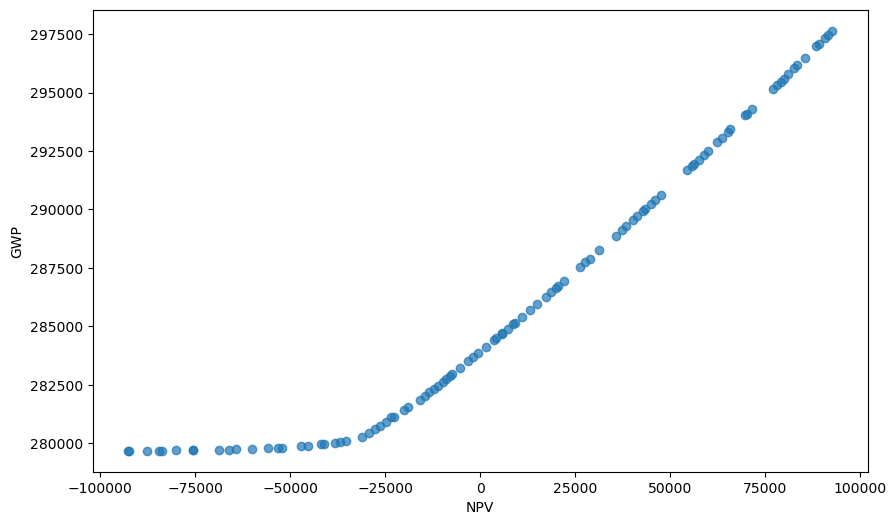

In [14]:
# 2.7
x = df["NPV"]
y = df["GWP"]

# 2.8
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel('NPV')
plt.ylabel('GWP')
plt.show()

Optimal NPV Threshold: -27655.20


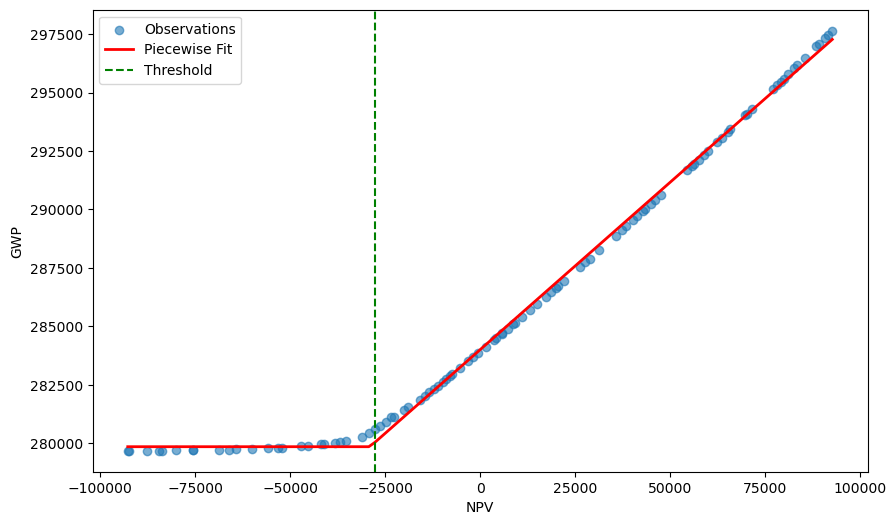

In [19]:
# 2.9 [−92.724, 92.702]
# 2.10

x = df['NPV'].values
y = df['GWP'].values

# Sorterar datan enligt NPV
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_sorted = y[sort_idx]

# Variabeler 
best_threshold = None
min_sse = float('inf') # Initialize minimum error as infinity
best_model_predictions = None

for i in range(5, len(x_sorted) - 5):
    threshold = x_sorted[i]

    # Delar datan 
    mask_left = x_sorted < threshold
    mask_right = ~mask_left
    
    x_left, y_left = x_sorted[mask_left], y_sorted[mask_left]
    x_right, y_right = x_sorted[mask_right], y_sorted[mask_right]

    # Vänster sida constant (Medelvärde)
    y_left_pred = np.full(y_left.shape, np.mean(y_left))
    

    # Höger sida Linjär Regrisson

    reg = LinearRegression()
    reg.fit(x_right.reshape(-1, 1), y_right)
    y_right_pred = reg.predict(x_right.reshape(-1, 1))
    
    
    # Sum of Squared Errors (SSE)
    # Summa av fel
    sse = np.sum((y_left - y_left_pred)**2) + np.sum((y_right - y_right_pred)**2)
    
    # Ser till att den bästa sparas
    if sse < min_sse:
        min_sse = sse
        best_threshold = threshold
        best_model_predictions = np.concatenate([y_left_pred, y_right_pred])

print(f"Optimal NPV Threshold: {best_threshold:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['NPV'], df['GWP'], alpha=0.6, label='Observations')
plt.plot(x_sorted, best_model_predictions, color='red', linewidth=2, label='Piecewise Fit')
plt.axvline(best_threshold, color='green', linestyle='--', label='Threshold')
plt.xlabel('NPV')
plt.ylabel('GWP')
plt.legend()
plt.show()

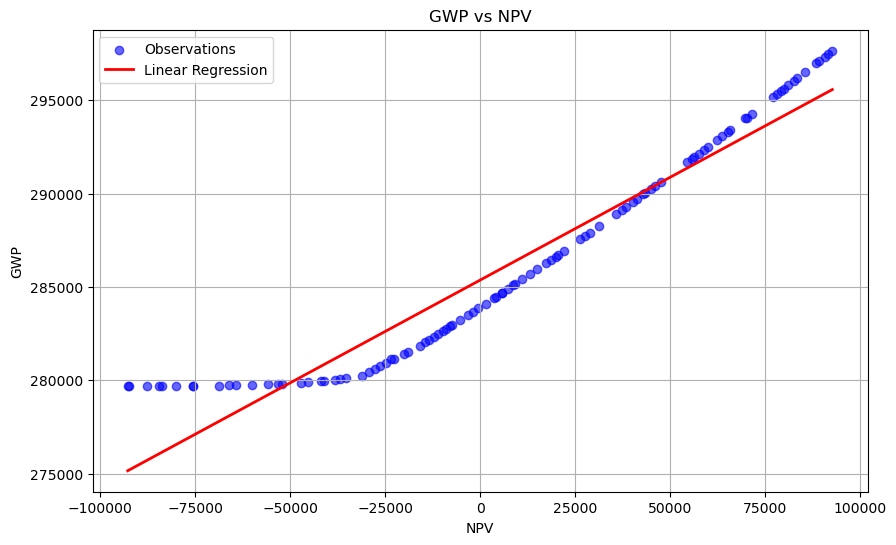

In [24]:
# 2.11
X = df['NPV'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X,y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_pred = model.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(df['NPV'], df['GWP'], color='blue', alpha=0.6, label='Observations')
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.title('GWP vs NPV')
plt.xlabel('NPV')
plt.ylabel('GWP')
plt.legend()
plt.grid(True)

plt.show()

In [26]:
# 2.12
score = model.score(X, y)
print(f"Score: {score}")

# Score värdet visar hur bra modellen passar datan

Score: 0.9265241636793241


In [27]:
# 2.13
# En Segmented Regression skulle vara bättre efter som det går att identifier två rätså raka linjer

In [29]:
# 2.14
def calculate_w1(x, y):
    """
    Calculates the slope w1 of the regression line.
    Formula: w1 = Σ((x - mean(x)) * (y - mean(y))) / Σ((x - mean(x))^2)
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    
    w1 = numerator / denominator
    return w1

def calculate_w0(x, y):
    """
    Calculates the intercept w0 of the regression line.
    Formula: w0 = mean(y) - w1 * mean(x)
    """
    # Calculate w1 first (as w0 depends on it)
    w1 = calculate_w1(x, y)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    w0 = y_mean - w1 * x_mean
    return w0

w1 = calculate_w1(x, y)
w0 = calculate_w0(x, y)

print(f"Optimal w1 (slope): {w1}")
print(f"Optimal w0 (intercept): {w0}")

Optimal w1 (slope): 0.1100423623023932
Optimal w0 (intercept): 285366.2250509255


In [ ]:
# 2.15 och 2.16
slope = model.coef_
intercept = model.intercept_
print(f"2.15 Slope: {slope} \nIntercept: {intercept}")
print(f"2.16 Slope: {w1} \nIntercept: {w0}")


2.15 Slope: [0.11004236] 
Intercept: 285366.2250509255
2.16 Slope: 0.1100423623023932 
Intercept: 285366.2250509255


In [ ]:
# 2.17 ja det gör dom